 -<h3>                                               PANDAS SALES ANALYSIS
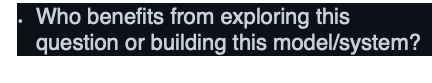
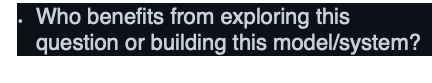
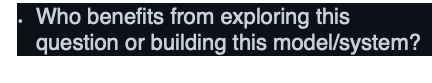
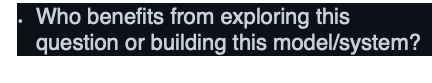
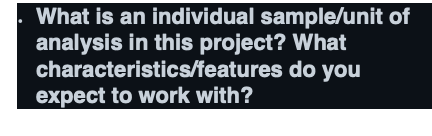
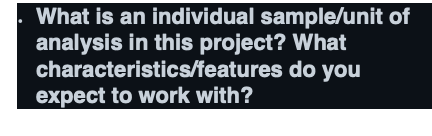
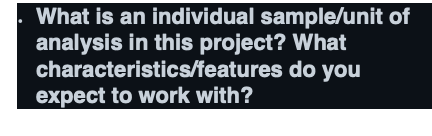
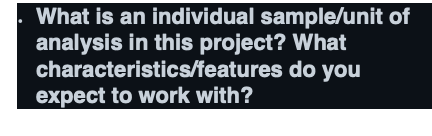
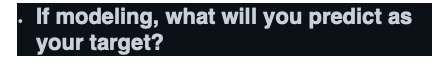
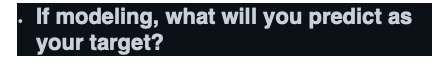
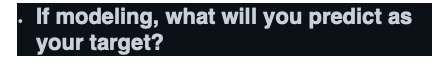
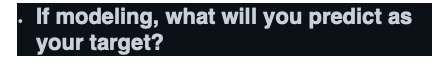
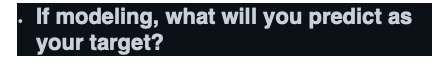
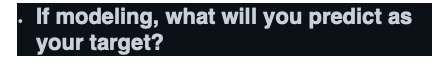
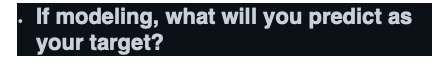
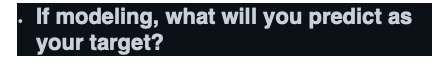

OBJECTIVE :

Uopn initil inspection the data ,  I can start thinking of some question about it that i would want to answer :

•	What is the   overall sales trend ?

•	What are the top 10 Countries of sales   ?

•	What are the most selling Item_Type  ?

•	Which are the most preferred Sales_Channel ?

• What is the most selling of Item_Type in 'Saudi Arabia' ?
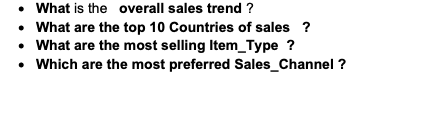
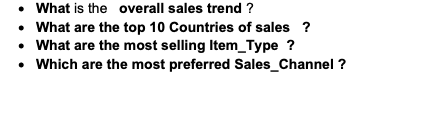
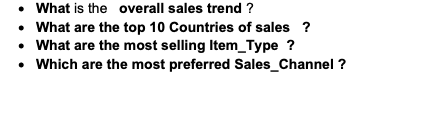
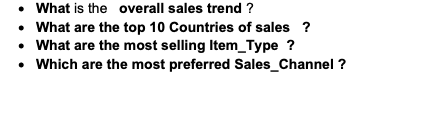

 -<h2>IMPORTING required libraries 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

 -<h4>IMPORTING THE DATASET

In [2]:
data = pd.read_csv('10000 Sales Records.csv')


 -<h3>DATA AUDIT

In [3]:
#firs 5 rows of the dataset

data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [5]:
#last 5 rows of the dataset

data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20
9999,Asia,Mongolia,Snacks,Offline,M,4/12/2016,824410903,4/16/2016,361,152.58,97.44,55081.38,35175.84,19905.54


In [6]:
#shape of data set

data.shape

(10000, 14)

In [7]:
#columns present in the dataset

data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
#aconcise summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [9]:
#checking missing values  

data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [11]:
#getting describetive statistics summary

data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [12]:
# Rename the colmuns and remove not need it

data.rename(columns={
                      'Item Type' : 'Item_Type',
                      'Sales Channel': 'Sales_Channel',
                      'Order Priority': 'Order_Priority',
       'Order Date': 'Order_Date',
                      'Order ID': 'Order_ID',
                      'Ship Date': 'Ship_Date', 
                      'Units Sold':  'Units_Sold', 
                      'Unit Price': 'Unit_Price',
                      'Unit Cost': 'Unit_Cost',
                      'Total Revenue': 'Total_Revenue',
                      'Total Cost': 'Total_Cost',
                      'Total Profit': 'Total_Profit'},
      inplace = True )

data.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [15]:
#change the Order_Date.str to int > datetime

data.Order_Date.str.slice(6).astype(int).head()




0      11
1    2015
2      11
3      12
4    2015
Name: Order_Date, dtype: int64

 -<h3>EXPLORATORY DATA ANALYSIS

 -<h3>• What is the overall sales trend ?

In [21]:

print('Date from :'  )
data.Order_Date.min()

Date from :


Timestamp('2010-01-01 00:00:00')

In [22]:
print('Date until  :')

data.Order_Date.max() 

Date until  :


Timestamp('2017-07-28 00:00:00')

In [33]:
#Grouping   

Order_Date_trnd = data.groupby('Order_Date').sum()['Total_Profit'].reset_index()


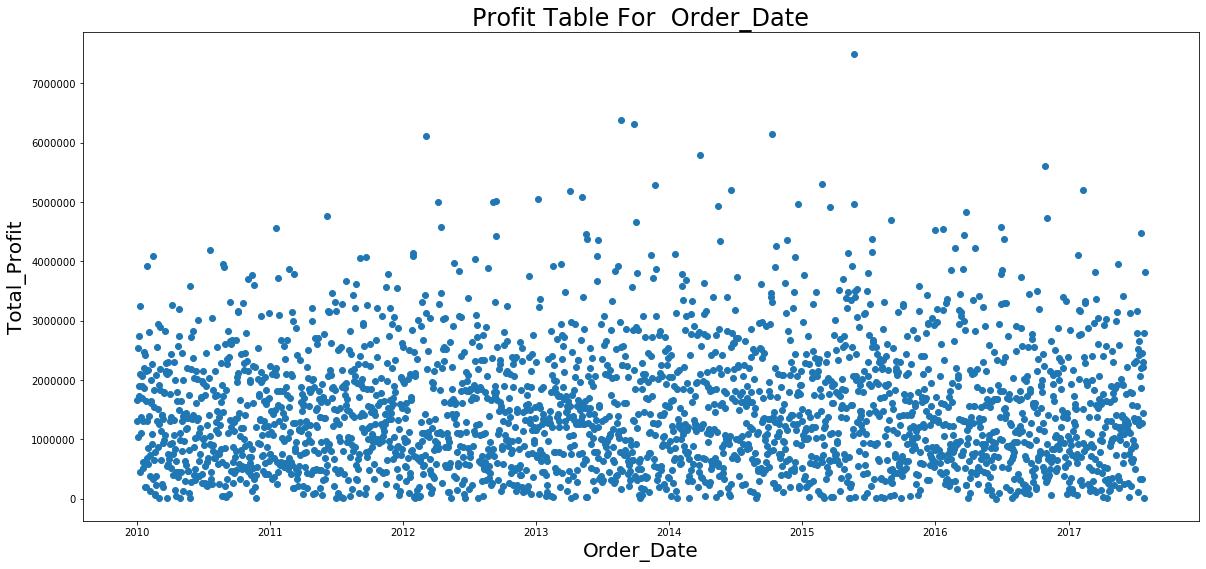

In [166]:
#setting  the figure size

plt.figure(figsize= (20 , 9))



plt.title("Profit Table For  Order_Date", fontsize=24)


plt.xlabel("Order_Date", fontsize=20)

plt.ylabel("Total_Profit", fontsize=20)




plt.scatter(Order_Date_trnd.Order_Date , Order_Date_trnd.Total_Profit)

 -<h3>•	What are the top 10 Countries of Total_Profit   ?



In [116]:
top_Country_pr = pd.DataFrame(data.groupby('Country').sum()['Total_Profit'])
top_Country_pr


top_c_pr = top_Country_pr.sort_values('Total_Profit' , ascending=False)

top_10_contry_pr =top_c_pr[:10]

top_10_contry_pr

,Total_Profit
Country,
Kiribati,32454798.26
Qatar,30861356.79
Grenada,30302769.90
Taiwan,30044779.98
Malawi,29329125.05
Botswana,29019726.67
Bangladesh,28092720.77
Lithuania,28063374.02
Burundi,27911293.45


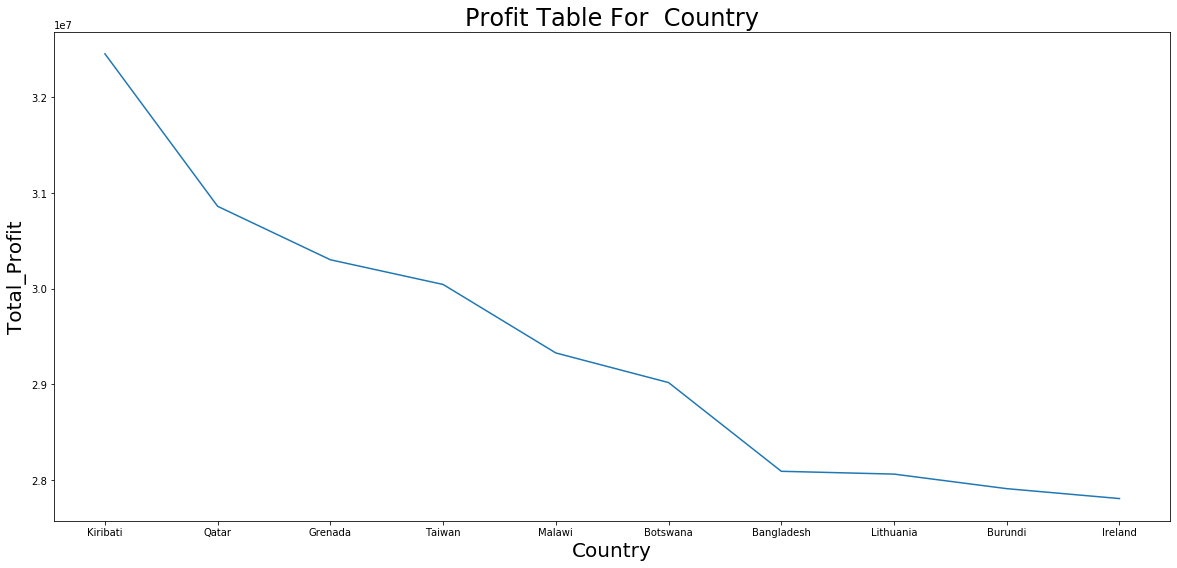

In [122]:
plt.figure(figsize= (20 , 9))



plt.title("Profit Table For  Country", fontsize=24)


plt.xlabel("Country", fontsize=20)

plt.ylabel("Total_Profit", fontsize=20)




plt.plot(top_10_contry_pr)


- <h3> •	What are the most selling Item_Type  ?  ( Units_Sold and Total_Profit)


In [129]:
top_item  = pd.DataFrame(data.groupby('Item_Type').sum()['Units_Sold'])
top_item 


,Units_Sold
Item_Type,
Baby Food,4197006
Beverages,3910436
Cereal,4203394
Clothes,4352350
Cosmetics,4103290
Fruits,4055921
Household,4336803
Meat,3985390
Office Supplies,4120263


In [130]:

top_item_by_Units_Sold=top_item.sort_values("Units_Sold", inplace = True  )


In [131]:
#Top Item_Type by   Units_Sold


top_item[:]

,Units_Sold
Item_Type,
Beverages,3910436
Meat,3985390
Fruits,4055921
Cosmetics,4103290
Office Supplies,4120263
Snacks,4122781
Baby Food,4197006
Cereal,4203394
Vegetables,4238098


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


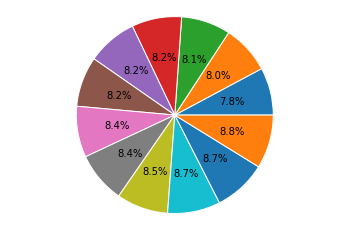

In [134]:
  #Top Item_Type by   Units_Sold

plt.pie(top_item,
        autopct = '%1.1f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "white",
                    'linewidth' : 1,
                    'antialiased': True})
  
# Equal aspect ratio ensures 
# that pie is drawn as a circle.
plt.axis('equal') 
  
plt.show()

In [132]:




top_item2  = pd.DataFrame(data.groupby('Item_Type').sum()['Total_Profit'])
top_item2 

,Total_Profit
Item_Type,
Baby Food,4.023250e+08
Beverages,6.123743e+07
Cereal,3.723787e+08
Clothes,3.196366e+08
Cosmetics,7.134390e+08
Fruits,9.774770e+06
Household,7.187384e+08
Meat,2.279643e+08
Office Supplies,5.201832e+08


In [89]:
top_item_by_Total_Profit=top_item2.sort_values("Total_Profit", inplace = True)


In [133]:
#Top Item_Type by   Total_Profit


top_item2[:]

,Total_Profit
Item_Type,
Baby Food,4.023250e+08
Beverages,6.123743e+07
Cereal,3.723787e+08
Clothes,3.196366e+08
Cosmetics,7.134390e+08
Fruits,9.774770e+06
Household,7.187384e+08
Meat,2.279643e+08
Office Supplies,5.201832e+08


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


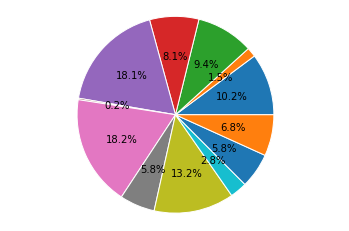

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


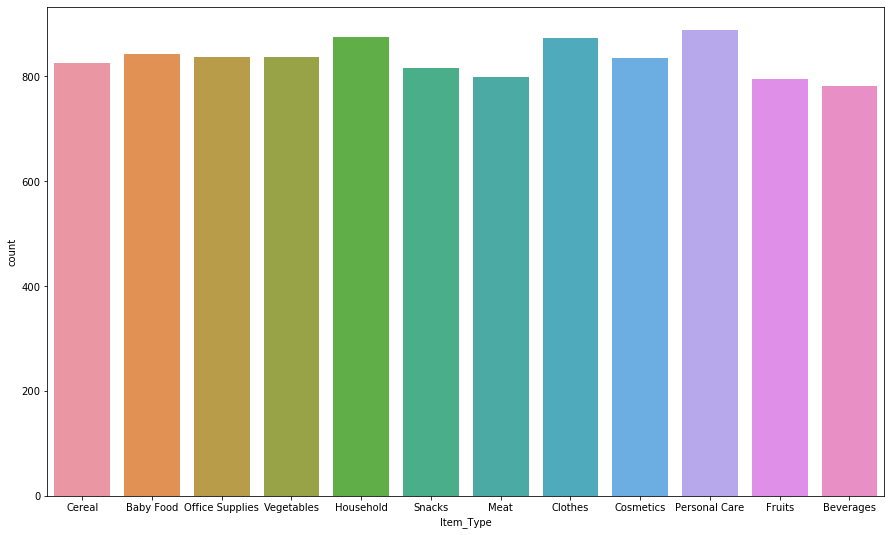

In [146]:
#Top Item_Type by   Total_Profit
plt.pie(top_item2,
        autopct = '%1.1f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "white",
                    'linewidth' : 1,
                    'antialiased': True})
  
# Equal aspect ratio ensures 
# that pie is drawn as a circle.
plt.axis('equal') 
  
plt.show()
plt.figure(figsize= (15 , 9))

sns.countplot(data['Item_Type'])



-<h3>   •	Which are the most preferred Sales_Channel ?

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


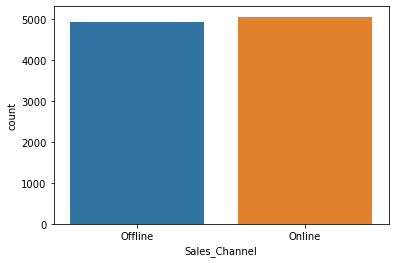

In [139]:


sns.countplot(data['Sales_Channel'])

 -<h3>•	What is the most selling of  Item_Type in    'Saudi Arabia' ?

In [147]:
dataSA=data[data.Country=='Saudi Arabia']
dataSA.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,month_year
9463,Middle East and North Africa,Saudi Arabia,Office Supplies,Offline,C,2011-08-12,860765349,9/1/2011,8450,651.21,524.96,5502724.50,4435912.00,1066812.50,2011-08
8494,Middle East and North Africa,Saudi Arabia,Baby Food,Offline,M,2016-08-24,318634259,9/19/2016,9813,255.28,159.42,2505062.64,1564388.46,940674.18,2016-08
640,Middle East and North Africa,Saudi Arabia,Meat,Offline,M,2014-02-19,605659806,3/21/2014,7051,421.89,364.69,2974746.39,2571429.19,403317.20,2014-02
4547,Middle East and North Africa,Saudi Arabia,Household,Online,H,2010-01-11,635028922,2/19/2010,8025,668.27,502.54,5362866.75,4032883.50,1329983.25,2010-01
418,Middle East and North Africa,Saudi Arabia,Cereal,Online,L,2014-03-23,368452107,3/26/2014,2021,205.70,117.11,415719.70,236679.31,179040.39,2014-03


In [148]:
dataSA.shape

(49, 15)

In [150]:
dataSA.describe()

,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
count,4.900000e+01,49.000000,49.000000,49.000000,4.900000e+01,4.900000e+01,4.900000e+01
mean,5.621192e+08,5668.306122,251.695918,179.342653,1.532182e+06,1.103452e+06,4.287299e+05
std,2.217238e+08,2992.471667,224.094656,184.015261,1.660546e+06,1.322863e+06,3.971267e+05
min,1.091331e+08,285.000000,9.330000,6.920000,2.329305e+04,1.615095e+04,6.690160e+03
25%,4.025282e+08,3107.000000,81.730000,35.840000,2.524368e+05,1.580917e+05,9.460150e+04
50%,5.621698e+08,5888.000000,154.060000,97.440000,8.765721e+05,5.597928e+05,3.167793e+05
75%,7.030824e+08,8136.000000,421.890000,263.330000,2.023309e+06,1.631051e+06,7.037175e+05
max,9.844139e+08,9991.000000,668.270000,524.960000,6.043880e+06,4.872154e+06,1.377746e+06


In [151]:



Item_Type_SA= pd.DataFrame(dataSA.groupby('Item_Type').sum()['Total_Profit'])

Item_Type_SA

,Total_Profit
Item_Type,
Baby Food,2379820.36
Beverages,418967.64
Cereal,1994338.08
Clothes,1553329.44
Cosmetics,2516420.51
Fruits,47544.48
Household,3281619.73
Meat,1077533.60
Office Supplies,4741318.75


In [157]:
top_item_by_Total_Profit_SA = Item_Type_SA.sort_values("Total_Profit", inplace = False)


In [161]:
Item_Type_SA[:]

,Total_Profit
Item_Type,
Fruits,47544.48
Beverages,418967.64
Snacks,909148.32
Personal Care,937118.70
Meat,1077533.60
Vegetables,1150607.38
Clothes,1553329.44
Cereal,1994338.08
Baby Food,2379820.36


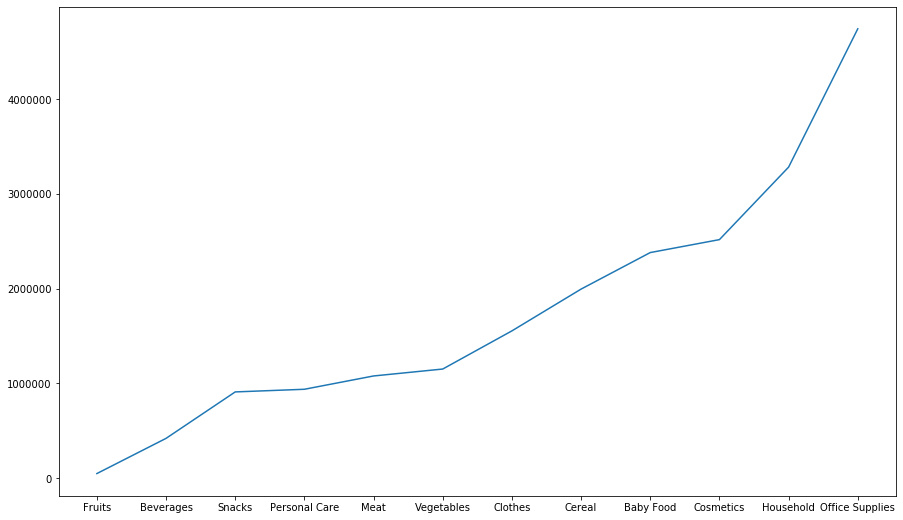

In [164]:
plt.figure(figsize= (15 , 9))


plt.plot(Item_Type_SA)